# Fibonacci ricorsivo ed iterativo

Questa è la versione ricorsiva della funzione che calcola i numeri di Fibonacci, come da esercizio in laboratorio del 18 dicembre.

In [1]:
def fib_rec(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib_rec(n-1) + fib_rec(n-2)

In [2]:
fib_rec(6)

8

Questa invece è la versione iterativa, come da esercizio del 6 novembre 2023.

In [4]:
def fib_iter(n):
    fib_prev = 0
    fib_curr = 1
    for i in range(2, n+1):
        fib_new = fib_curr + fib_prev
        fib_prev = fib_curr
        fib_curr = fib_new
    return fib_curr

In [5]:
fib_iter(6)

8

Misuriamo quanto vi mette `fib_iter` a calcolare il decimo numero di Fibonacci.

In [7]:
%%timeit
fib_iter(10)

213 ns ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Se aumentiamo di uno il parametro in input, il tempo di esecuzione cambia di poco. Questo perché, nel ciclo che implementa la funzione `fib_iter`, faremo una sola iterazione in più rispetto al caso precedente.

In [9]:
%%timeit
fib_iter(11)

227 ns ± 9.04 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Se raddoppiamo il numero il parametro da `10` a `20`, il tempo di esecuzione circa raddoppia.

In [10]:
%%timeit
fib_iter(20)

489 ns ± 1.78 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Questo perché la complessità della funzione `fib_iter` è dell'ordine di O(n): il numero di operazioni che compie (ad esepio, il numero di moltiplicazioni) è proporzionale ad `n`.

Con la versione ricorsiva, invece, accade qualcosa di molto più drastico. Cominciamo col caso in cui l'input è 10. Ovviamente la versione ricoriva è più lenta di quella iterativa, ma questo non ci stupisce.

In [11]:
%%timeit
fib_rec(10)

5.42 µs ± 56.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Ma se aumentiamo di uno il parametro in input, da 10 a 11, il tempo di esecuzione non aumenta di poco, bensì quasi raddoppia.

In [13]:
%%timeit
fib_rec(11)

8.74 µs ± 221 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit
fib_rec(12)

14.1 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Perché questo notevole peggioramente nel passare da 10 a 11 e da 11 a 12 ? Notare che calcolare il 40° numero di fibonacci con la funzione ricorsiva richiede vari secondi, mentre con la versione iterativa è istantaneo.

In [20]:
fib_rec(40)

102334155

In [21]:
fib_iter(40)

102334155

Per capire come mai la versione ricorsiva è così più lenta di quella iterativa, si può esaminare il seguente grafico, che mostra tutte le chiamate di funzioni effettuate per `fib_rec(4)`.

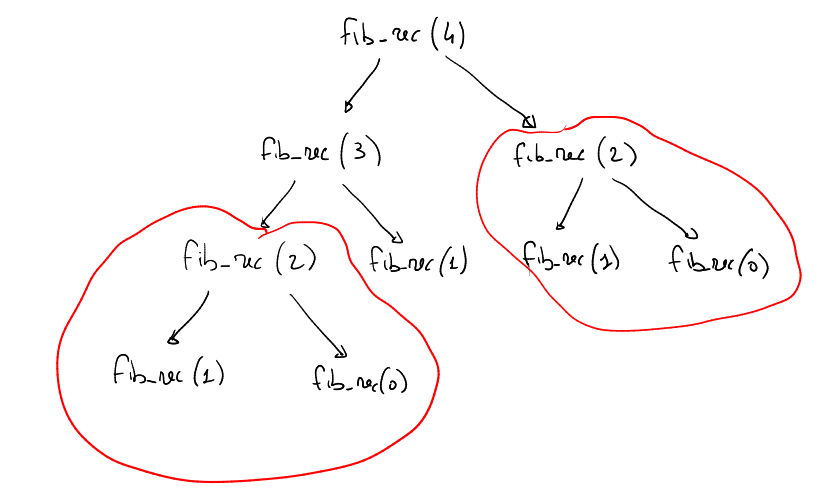

Si nota come `fib_rec(0)`, `fib_rec(1)` e `fib_rec(2)` vengono richiamate ripetutamente. Tutta la parte evidenziata in rosso è ripetuta esattamente due volte. La cosa è ancora più evidente quando si considera la chiamata a `fib_rec(5)`.

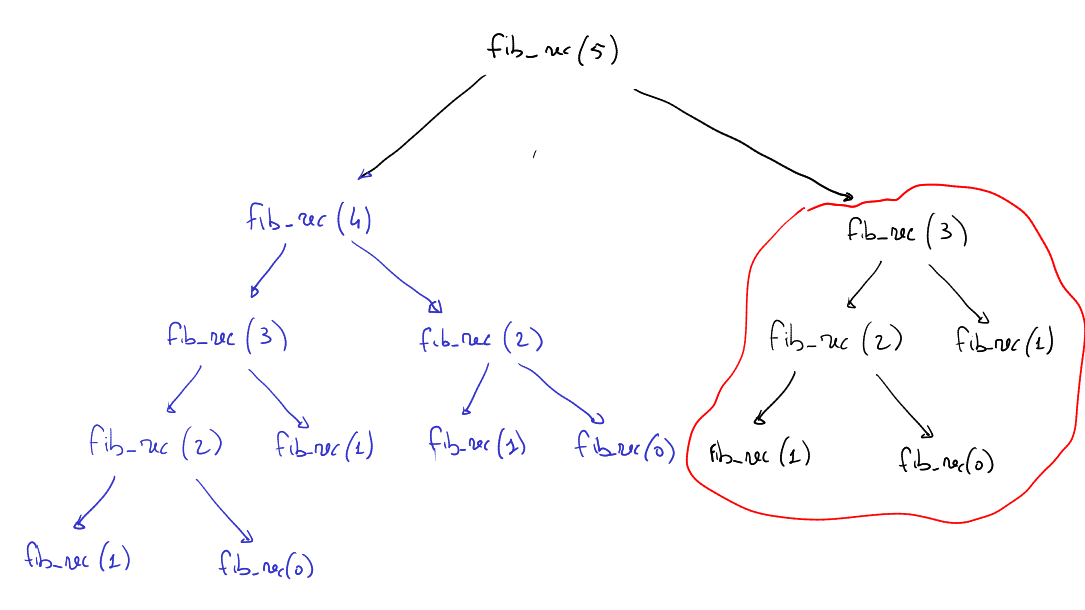

La parte in blu è quella relativa a `fib_rec(4)`. Si vede come passare da `fib_rec(4)` a `fib_rec(5)` non causa soltanto una chiamata ricorsiva in più ma tutto il blocco di chiamate in nero. In particolare, la computazione necessaria per determina `fib_rec(3)`, evidenziate in rosso, viene ripetuta di nuovo nonostante sia già stata eseguita per calcolare `fib_rec(4)`.

Questa continua ripetizione delle stesse computazioni causa l'enorme complessità computazionale di `fib_rec(n)`.

# File

Vedremo come scrivere programmi che manipolano file. Un file, per il sistema operativo, è semplicemente una sequenza di byte con un nome associato. Dal punt di vista di come un file è utilizzato, si possono distinguere:
* file binari
* file di testo

I file di testo sono quelli che contengono caratteri, codificati in ASCII o le sue estensioni come Unicode. I file di testo possono essere aperti con un editor di testo quale il *Notepad* di Windows o il *Text Editor* di Linux. I file binari contengono invece sequenze di byte che non possono essere interpretati in maniera sensata come sequenze di caratteri.

Noi ci occuperemo solo dei file di testo.

Per operare su un file, di solito si seguono i seguenti passi:
* aprire il file
* leggere / scrivere il contenuto
* chiudere il file

## Lettura di file

La seguente istruzione apre il file `prova.txt` in modalità lettura (la `r` come secondo argomento è l'abbreviazione di `read`). Il risultato è un oggetto di tipo file che noi salviamo nella variabile `f`. Ci servirà dopo perché questo oggetto ha dei metodi che ci consentono di operare sul file. 

In [34]:
f = open("input.txt", "r")

Visualizzare il contenuto di `f` ci dice il nome del file, la modalità con cui è stato aperto (lettura, `r`)  e il set di caratteri usato per la codifica (UTF-8).

In [35]:
f

<_io.TextIOWrapper name='input.txt' mode='r' encoding='UTF-8'>

Uno dei metodi che si possono chiamare sull'oggetto `f` è `readline()`, che legge una riga del file e la restituisce come risultato.

In [36]:
f.readline()

'23\n'

Notare che, anche se si tratta di un numero, in maniera simile alla funzione `input` il risultato è comunque una stringa. Inoltre, l'ultimo carattere della stringa è la sequenza di escape `\n` che rappresenta il carattere di andata a capo (codice ASCII 10).

In [37]:
f.readline()

'ciao sono io\n'

In [38]:
f.readline()

'12\n'

Quando il file è terminato, ogni uteriore chiamata del metodo `readline` restituirà una stringa vuota.

In [39]:
f.readline()

''

Una volta che abbiamo letto il file possiamo chiuderlo con metodo `close()`.

In [41]:
f.close()

Finché un file è aperto, il sistema operativo deve tenere in memoria delle strutture dati per la sua gestione. Pertanto, sempre meglio chiudere un file appena non si usa. Se ci si dimentica di chiuderlo, normalmente viene chiuso automaticamente quando il programma termina. Tuttavia, con alcune implementazioni di Python, se il file è aperto in scrittura, si potrebbero anche perdere le modifiche effettuate.

Una volta che il file è chiuso, ulteriori tentativi di lettura generano un errore.

In [42]:
f.readline()

ValueError: I/O operation on closed file.

Proviamo ora a scrivere del codice che legge un file costituito da tante righe contenenti numeri, fa la somma di queste righe e stampa il risultato della somma. Si tratta di chiamare ripetutamente il metodo `readline` finché non c'è più niente da leggere. Si rimanda alla lezione del 24 dove vengono esaminate strategie diverse per leggere ripetutamente da tastiera (le stesse strategie si applicano alla lettura da file). Noi useremo la strategia denominata *con lettura di preparazione*.

In [46]:
f = open("input2.txt", "r")
sum = 0
# legge la prima riga
linea = f.readline()
while linea != "":
    # elabora la linea
    sum += int(linea)
    # leggo nuova riga
    linea = f.readline()
print(sum)
f.close()

24


## Scrittura di un file

Per scrivere un file:
* il file va aperto in modalità scrittura, usando la stringa "w" (per write) come secondo parametro;
* si può usare il metodo `write` invece di readline per scrivere una stringa dentro al file.

Il seguente programma scrive sul file `out.txt` il seguente contenuto:
```
Ciao
mi chiamo Gianluca
```

In [45]:
pippo = open("out.txt", "w")
pippo.write("Ciao\n")
pippo.write("mi chiamo Gianluca\n")
pippo.close()

Notare che se il file esiste già, viene svuotato come prima cosa. Se vogliamo che le nostre scritte si aggiungano in fondo ad un file, dovremo usare "a" (append) come metodo di apertura invece di "w". 

Supponiamo di voler riprendere il programma dell'esempio precedente ma ora, oltre a calcolare la somma, vogliamo che il nostro programma generi un file di output che contenga:
* gli stessi numeri del file in input, allineati a destra
* una sequenza di simboli meno
* la somma dei numeri

Ad esempio, se l'input è il file
```
2
3
10
9
```
il file di output dovrà contenere qualcosa come
```
    2
    3
   10
    9
------
   24

In [49]:
infile = open("input2.txt", "r")
outfile = open("out2.txt", "w")
sum = 0
# leggo prima riga
linea = infile.readline()
while linea != "":
    # converto in intero la linea
    n = int(linea)
    # scrivo il numero allineato nel file di output
    outfile.write(f"{n:8}\n")
    # aggiorno la somma
    sum += n
    # leggo nuova riga
    linea = infile.readline()
infile.close()
outfile.write("------------\n")
outfile.write(f"{sum:8}\n")
outfile.close()

### Domanda di uno studente

Supponiamo di volere perfezionare il programma in modo da scrivere un simbolo `+` a destra di ogni numero, tranne che a destra dell'ultimo numero letto in input a destra del quale va il carattere `=`. Notare che al momento in cui il numero `n` viene visualizzato, non sappiao ancora se è l'ultimo oppure no, e se quindi andrà seguito da un `+` o un `=`. Per questo, la scrittura di  `+` e  `=` va posticipatà fino a che non abbiamo letto la riga successiva.

In [ ]:
infile = open("input2.txt", "r")
outfile = open("out2.txt", "w")
sum = 0
# leggo prima riga
linea = infile.readline()
while linea != "":
    # converto in intero la linea
    n = int(linea)
    # scrivo il numero allineato nel file di output (senza andata a capo)
    outfile.write(f"{n:8}")
    # aggiorno la somma
    sum += n
    # leggo nuova riga
    linea = infile.readline()
    # aggiungo carattere + o = e vado a capo
    outfile.write(" =\n" if linea == "" else " +\n")
infile.close()
outfile.write("------------\n")
outfile.write(f"{sum:8}\n")
outfile.close()

## Leggere i file con un for

Invece di leggere le righe di un file esplicitamente con il metodo `readline`, si può sfruttare il fatto che un file in Python è un tipo iterabile: vuol dire che può essere messo dentro una istruzione `for`, in maniera analoga alle stringhe, le liste e i range. Scrivere
```python
for l in f:
    # fa qualcosa
```
esegue il corpo del for tante volte, una per ogni linea del file `f` che viene copiata di volta in volta nella variabile `l`. Ad esempio, il programma di prima che calcola la somma dei numeri in `input2.txt` può essere riscritto come segue.

In [53]:
f = open("input2.txt", "r")
sum = 0
for linea in f:
    # faccio qualcosa
    sum += int(linea)
print(sum)
f.close()

24


### Domanda di uno studente

Riprendiamo il problema di prima, quello di prendere i dati in input da un file, e produrre in output un altro file con i dati formattati, i totali, e i segni + o = a destra di ogni numero. Se proviamo a rifarlo utilizzando il `for` per leggere le linee dal file invece che il `while`, notiamo che la cosa è un po' complicata, più che altro per la necessità di distinguere il caso in cui mettere il `+` e il caso in cui mettere il simbolo `=`. Il problema è che non possiamo sapere se mettere `+` o `=` finché abbiamo letto la riga successiva, ma nel caso dell'uso del `for` vuol dire che i `+` e `=` finali di una riga vanno inseriti nella iterazione successiva.  Dentro il `for`, quindi, la prima cosa che dovremo fare è aggiungere il `+` per la riga precedente dell'output. Questo però non vale per la prima iterazione del `for`, nella quale non c'è nessuna riga precedente da completare. Per distinguere la prima iterazione dalle altre usiamo la variabile booleana `first`.

In [8]:
infile = open("input2.txt", "r")
outfile = open("out2.txt", "w")
sum = 0
# utilizzata per distinguere la prima iterazione del for dalle successive
first = True
for linea in infile:
    if not first:
        # se non sono alla prima iterazione, scrivo per prima cosa il + e l'andata a capo
        # per la riga precedente dell'output.
        outfile.write("+\n")
    else:
        # altrimenti, se sono alla prima iterazione, non scrivo nulla ma aggiorno la
        # variabile first.
        first = False
    # converto in intero la linea
    n = int(linea)
    # scrivo il numero allineato nel file di output (senza andata a capo)
    outfile.write(f"{n:8} ")
    # aggiorno la somma
    sum += n
infile.close()
# concludo l'ultima riga mettendo l'uguale
outfile.write("=\n")
# scrivo il totale
outfile.write("------------\n")
outfile.write(f"{sum:8}\n")
outfile.close()

Ad ogni modo, questa soluzione è meno leggibile della precedente. La morale di questo esempio è che di solito usare il `for` per leggere un file rende il programma più leggibile, ma non sempre.

## L'istruzione with

Per evitare di dimenticarsi di chiudere un file, Python mette a disposizione l'istruzione `with` che si occupa di chiudere automaticamente un file. Il programma di prima, con l'istruzione `with` diventa:

In [39]:
with open("input2.txt", "r") as f:
    sum = 0
    for linea in f:
        # faccio qualcosa
        sum += int(linea)
    print(sum)

24


In pratica viene eseguita la funzione `open("input2.txt", "r")` ed il risultato viene messo in `f`. Poi viene eseguito tutto il corpo del `with`. Quando il corpo è finito, il file `f` viene chiuso automaticamente.

In realtà, la `with` fa qualcosa in più rispetto alla semplice chiusura automatica, ma per questo dovremo aspettare la prossima lezione sulle eccezioni.

## Elaborare più dati sulla stessa riga

Nell amaggior parte dei casi, una riga di un file non conterrà una singola informazione, ma più informazioni separate da caratteri come spazi e virgole. Per trattare file di questo tipo, facciamo prima una digressione e parliamo del metodo `split` per le string.

Il metodo `split()` prende la stringa a cui è applicato, la divide in sottostringhe separati da spazi, e restituisce le varie sottostringhe sotto forma di una lista di stringhe.

In [55]:
s = "ciao 23     sono   -1"

In [56]:
s.split()

['ciao', '23', 'sono', '-1']

I pezzi che compongo `s`, ovvero `ciao`, `23`, `sono` e `-1` sono stati separati e restituiti sotto forma di una lista.

Può accadere che le informazioni in una riga non siano separati da spazi ma altri caratteri, come le virgole. In tal caso, il carattere separatore può essere indicato come argomento di `split`.

In [57]:
s="23,12,34"

Se provo una semplice `s.split()`, l'intera stringa `23,12,34` viene considerata come una unica componente.

In [58]:
s.split()

['23,12,34']

Se invece fornisco la virgola come parametro, i tre numeri vengono correttamente separati.

In [59]:
s.split(",")

['23', '12', '34']

A questo punto, però, gli spazi non hanno nessun trattamente particolare e sono visti come caratteri veri e propri e non elementi di separazione.

In [60]:
"23, 12, 24".split(",")

['23', ' 12', ' 24']

Si vede come le stringhe risultato di `split` contengono degli spazi.

Vediamo adesso di mettere a buon uso questa funzione `split`. Supponiamo che il nostro file `input3.txt` abbia questa struttura:
```
Pescara 123 88
Chieti 67 23
Teramo 88 182
```
e supponiamo di voler produre come output la stessa sequenza di città, ma con accanto un numero ottenuto come somma dei due numeri dati. Dando in input l'esempio di sopra, vorremmo ottenere:
```
Pescara 211
Chieti 90
Teramo 270
```
Possiamo leggere il file di input una riga alla volta, e usare il metodo `split` per separare le tre colonne.

In [62]:
with open("input3.txt", "r") as f:
    for linea in f:
        # Uso l'assegnmento multiplo per mettere i tre valori che risultano dal metodo `split()`
        # direttamente nelle tre variabili citta, x ed y. Si veda la lezione del 21 novembre 2023.
        citta, x, y = linea.split()
        print(citta, int(x) + int(y))

Pescara 211
Chieti 90
Teramo 270


## Leggere uno o più caratteri alla volta

Un'alternativa all'uso di `readline` o del `for`  è l'uso del metodo `read`. Il metodo `read()`, se usato senza parametri, legge tutto il file fino alla fine e lo restituisce come una unica stringa. Altrimenti, se viene specificato un numero come parametro, leggerà il numero di caratteri specificato nel parametro.

In [66]:
f = open("input3.txt", "r")

In [67]:
# legge un carattere
f.read(1)

'P'

In [68]:
# legge il carattere successivo
f.read(1)

'e'

In [69]:
# legge i successivi 5 caratteri
f.read(5)

'scara'

In [70]:
# legge tutto fino alla fine
f.read()

' 123 88\nChieti 67 23\nTeramo 88 182\n'

In [71]:
f.close()

Voglio usare `read(1)` per leggere un file un carattere alla volta e contare quante volte compare nel file ogni lettera dell'alfabato. Per far ciò userò una lista per contenre i conteggi di tutte le lettere. La posizione `0` della lista conterrà il numero di `A` lette dal file, la posizione `1` il numero di `B` fino alla posizione `25` che contiene il numero di `Z`.

Mi servirà però il modo di convertire una lettera da `A` a `Z` in un numero da 0 a 25 e, viceversa, il modo di convertire un numero da 0 a 25 in una lettera da `A` a `Z`. Per questo possono tornare utili le funzioni predefinite `chr` e `ord`.

La funzione `ord` perende in input un carattere e restituisce il codice Unicode associato carattere (è un intero).

In [75]:
# La lettere A maiuscola ha codice Unicode (e ASCII) 65
ord("A")

65

In [76]:
# La lettere B maiuscola ha codice Unicode (e ASCII) 66
ord("B")

66

La funzione `chr` fa esattamente il contrario: prende un intero e restituisce il carattere che ha il codice Unicode passato come parametro.

In [77]:
# La lettere A maiuscola ha codice Unicode (e ASCII) 65
chr(65)

'A'

Se nella variabile `ch` ho un carattere da `A` a `Z` e voglio convertirlo in un numero da `0` a `25`, mi basta calcolare il codice numerico di `ch` (che va da 65 in poi) e sottrarre 65 (che è il codice della A maiuscola. Questo perché i codici numerici delle lettere maiuscole sono consecutivi. Viceversa, se ho un numero `i` da 0 a 25 e voglio trasformarlo in una lettera da `A` a `Z`, mi basta sommare ad `i` il codice numerico della lettera `A` (65) e passare il tutto alla funzione `chr`.

Siamo pronti per scrivere il programma voluto.

In [79]:
with open("input3.txt") as f:
    # creo la lista che conterrà i conteggi delle 26 lettere
    conteggi = [0] * 26
    # leggo il primo carattere
    ch = f.read(1)
    while ch != "":
        # converto in maiuscolo
        ch = ch.upper()
        # se il carattere è una lettera, ovvero è compreso tra "A" e "Z"
        if "A" <= ch <= "Z":
            # determino l'equivalente numerico di ch
            x =  ord(ch) - ord("A")
            # incremento il conteggio corretto
            conteggi[x] += 1
        # leggo un nuovo carattere
        ch = f.read(1)

# visualizzo ail risultato
for i in range(len(conteggi)):
    # converto l'indice i in una lettera
    ch = chr(i + ord('A'))
    print(ch, conteggi[i])

A 3
B 0
C 2
D 0
E 3
F 0
G 0
H 1
I 2
J 0
K 0
L 0
M 1
N 0
O 1
P 1
Q 0
R 2
S 1
T 2
U 0
V 0
W 0
X 0
Y 0
Z 0
